##Predicting whether a substance is rock or mine...


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('sonar.csv', header=None)

In [3]:
# data

In [4]:
data.shape

(208, 61)

In [5]:
data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [7]:
X = data.drop(columns=60, axis=1)
y = data[60]

In [8]:
print(X)
# print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)



(208, 60) (166, 60) (42, 60)
(208,) (166,) (42,)


In [61]:
model = LogisticRegression()
# modelR = RandomForestClassifier()
modelR = RandomForestClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    n_estimators=100
)
modelK = KNeighborsClassifier()
modelS = SVC()
modelSGD = SGDClassifier()

In [62]:
model.fit(X_train, y_train)
modelR.fit(X_train, y_train)
modelK.fit(X_train, y_train)
modelS.fit(X_train, y_train)
modelSGD.fit(X_train, y_train)


SGDClassifier()

In [63]:
X_train_predicitonL = model.predict(X_train)
X_train_predictonR = modelR.predict(X_train)
X_train_predicitonK = modelK.predict(X_train)
X_train_predicitonS = modelS.predict(X_train)
X_train_predictionSGD = modelSGD.predict(X_train)

In [64]:
acc_trainL = accuracy_score(X_train_predicitonL, y_train)
print(f"Accuracy on training data by Logistic Regression: {acc_trainL}\n")

acc_trainR = accuracy_score(X_train_predictonR, y_train)
print(f"Accuracy on training data by Random Forest: {acc_trainR}\n")

acc_trainK = accuracy_score(X_train_predicitonK, y_train)
print(f"Accuracy on training data by K-Nearest Neighbors: {acc_trainK}\n")

acc_trainS = accuracy_score(X_train_predicitonS, y_train)
print(f"Accuracy on training data by Support Vector Machine: {acc_trainS}\n")

acc_trainSGD = accuracy_score(X_train_predictionSGD, y_train)
print(f"Accuracy on training data by Stochastic Gradient Descent: {acc_trainSGD}")

Accuracy on training data by Logistic Regression: 0.8072289156626506

Accuracy on training data by Random Forest: 1.0

Accuracy on training data by K-Nearest Neighbors: 0.8493975903614458

Accuracy on training data by Support Vector Machine: 0.8614457831325302

Accuracy on training data by Stochastic Gradient Descent: 0.7469879518072289


In [65]:
X_test_predictionL = model.predict(X_test)
X_test_predictionR = modelR.predict(X_test)
X_test_predictionK = modelK.predict(X_test)
X_test_predictionS = modelS.predict(X_test)
X_test_predictionSGD = modelSGD.predict(X_test)

acc_testL =accuracy_score(X_test_predictionL, y_test)
acc_testR =accuracy_score(X_test_predictionR, y_test)
acc_testK =accuracy_score(X_test_predictionK, y_test)
acc_testS =accuracy_score(X_test_predictionS, y_test)   
acc_testSGD=accuracy_score(X_test_predictionSGD, y_test)

print(f"Accuracy on test data by Logistic Regression: {acc_testL}\n")
print(f"Accuracy on test data by Random Forest: {acc_testR}\n")
print(f"Accuracy on test data by K-Nearest Neighbors: {acc_testK}\n")
print(f"Accuracy on test data by Support Vector Machine: {acc_testS}\n")
print(f"Accuracy on test data by Stochastic Gradient Descent: {acc_testSGD}")


Accuracy on test data by Logistic Regression: 0.8095238095238095

Accuracy on test data by Random Forest: 0.8809523809523809

Accuracy on test data by K-Nearest Neighbors: 0.8095238095238095

Accuracy on test data by Support Vector Machine: 0.8333333333333334

Accuracy on test data by Stochastic Gradient Descent: 0.7380952380952381


In [66]:
input = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

#changing the input data to numpy array
input_reshape = np.asarray(input)
pred= modelSGD.predict(input_reshape.reshape(1,-1))

if pred[0] ==0:
    print("It's a ROCK")
else:
    print("It's a MINE")

It's a MINE


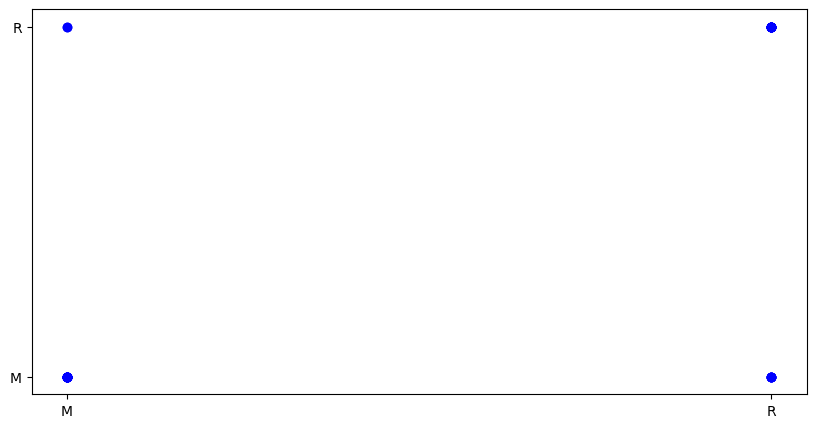

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_test, X_test_predictionL, c='blue', label='logistic')
plt.plot()